# Исследование объявлений о продаже квартир / Research of advertisements for the sale of apartments

Данные: архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 


Data: archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years.

Требуется определить рыночную стоимость объектов недвижимости.


It is required to determine the market value of real estate.

Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


The task is to set parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


For each apartment for sale, two types of data are available. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and pond.

### Откроем файл с данными и изучим общую информацию:  / Let's open the data file and examine the general information:

In [1]:
import pandas as pd
data = pd.read_csv('/Users/vladamalkina/Desktop/ЯП проекты/проект 3/real_estate_data_third_project.csv')
display(data.head())

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               12180 non-null  float64
 15  locality_name      

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'}>, <AxesS

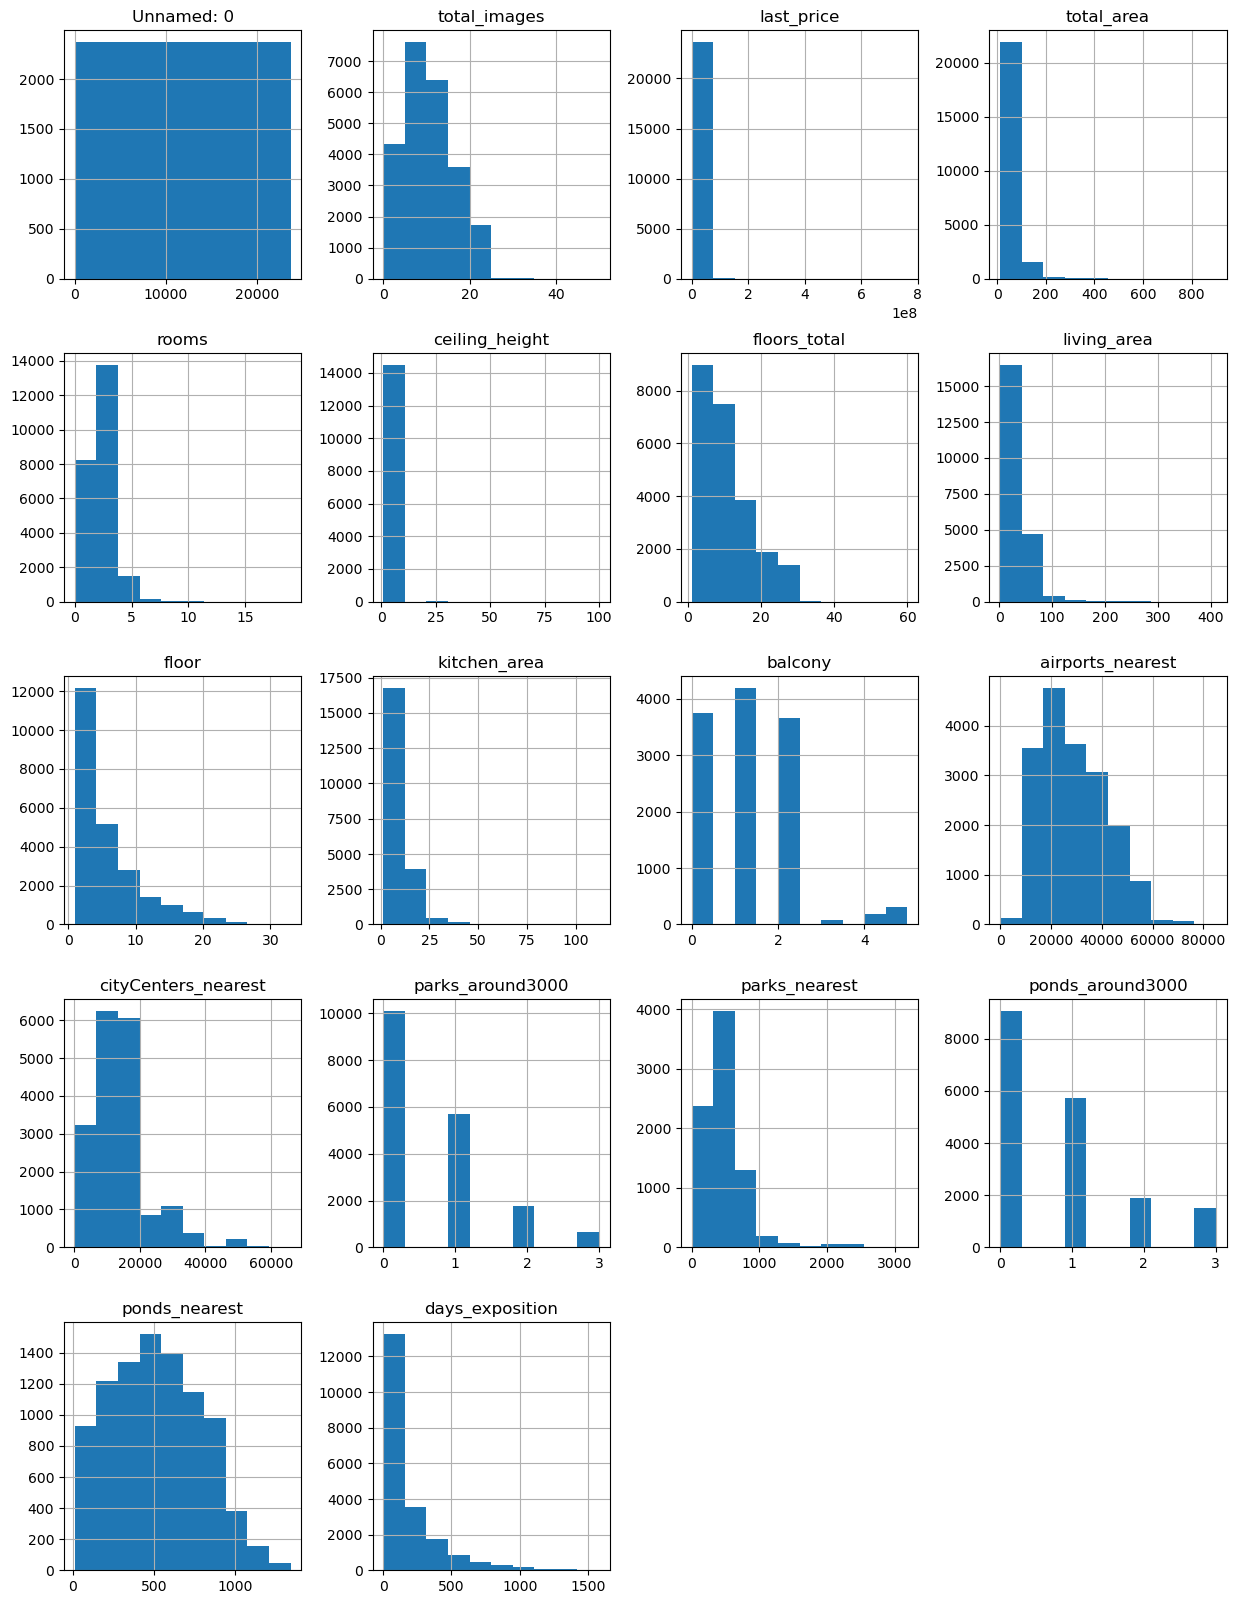

In [3]:
data.hist(figsize=(15, 20))

В полученных данных имеются пропуски (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition). Неправильные типы данных в столбцах: is_apartment, balcony.

There are gaps in the received data (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition). Incorrect data types in columns: is_apartment, balcony.

### Выполним предобработку данных: / Let's preprocess the data:

In [4]:
data.isna().sum()

Unnamed: 0                  0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data.loc[data['balcony'].isna(), 'balcony'] = 0
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
print(data.isna().sum())

Unnamed: 0                  0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Обнаружены пропущенные значения в следующих столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 
Возможно заполнить пропуски в следующих столбцах: balcony и is_apartment. Пропуски в balcony можно интерпретировать как отсутствие балконов, пропуски в is_apartment можно интерпретировать как false.

Missing values were found in the following columns: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.
It is possible to fill in the blanks in the following columns: balcony and is_apartment. Gaps in balcony can be interpreted as the absence of balconies, gaps in is_apartment can be interpreted as false.

In [6]:
data['balcony'] = data['balcony'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          23699 non-null  bool   
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               23699 non-null  int64  
 15  locality_name      

Изменены типы данных в следующих столбцах: balcony, is_apartment. Число балконов может быть только целым числом(int), is_apartment принимает 1 из 2 значений: True или False (тип bool)

Data types were changed in the following columns: balcony, is_apartment. The number of balconies can only be an integer (int), is_apartment takes 1 of 2 values: True or False (bool type)

In [7]:
def local_name(row):
    try:
        row = row.replace('ёл', 'ел')
        row = row.replace('городской', '')
        row = row.replace('городского типа', '')
        row = row.replace('коттеджный', '')
        row = row.replace('при железнодорожной', '')
        row = row.replace('садовое', '')
        row = row.replace('садоводческое некоммерческое', '')
        row = row.replace(' пос', 'пос')
        row = row.replace(' тов', 'тов')
        row = row.replace('поселок ', '')
        row = row.replace('товарищество ', '')
        row = row.replace('деревня ', '')
        return row
    except: 
        pass

data['locality_name'] = data['locality_name'].apply(local_name)
print(data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 ' Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' ' Лебяжье' ' Сиверский' 'Молодцово'
 ' Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 ' Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'село Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры'
 ' Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное' 'село Павлово' 'Оредеж'
 'село Копорье' 'Молодёжное' 'Тихвин' 'Победа' 'Нурма' ' Синявино' 'Тосно'
 'Стрельна' 'Бокситогорск' 'Александровская' 'Лопухинка' 'Пикалёво'
 'Терволово' ' Советский' 'Подпорожье' 'Петровское' ' Токсово' 'Сельцо'
 ' Вырица' 'Кипень' 'Келози'

In [8]:
#print(data['ceiling_height'].loc[data['ceiling_height']>21])
data.loc[data['ceiling_height']>21, 'ceiling_height'] = data['ceiling_height']/10
#print(data['ceiling_height'].max())

#print(data['rooms'].mean())
data.loc[(data['ceiling_height']==1) | (data['ceiling_height']==1.75), 'ceiling_height'] = ''

In [9]:
#print(data.max())
data.loc[(data['floors_total']==60) | (data['floors_total']==52), 'floors_total'] = ''
#print(data['floors_total'].min())
data.loc[data['kitchen_area'] > 50, 'kitchen_area'] = data['kitchen_area']/10

### Посчитаем и добавим в таблицу новые столбцы: / Let's calculate and add new columns to the table:

Посчитаем и добавим в таблицу:
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

Let's calculate and add to the table:
- day of publication of the ad (0 - Monday, 1 - Tuesday, etc.)
- month of publication of the advertisement
- year of publication of the advertisement
- apartment floor type (values ​​- “first”, “last”, “other”)
- distance in km to the city center

In [10]:
data['price_one_metre'] = data['last_price']/data['total_area']
print(data['price_one_metre'].head(10))

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
5     95065.789474
6     99195.710456
7    110544.692737
8     87454.764777
9     88524.590164
Name: price_one_metre, dtype: float64


In [11]:
data['day_of_publication'] = pd.to_datetime(data['first_day_exposition']).dt.weekday
print(data['day_of_publication'].head(10))

0    3
1    1
2    3
3    4
4    1
5    0
6    3
7    3
8    2
9    6
Name: day_of_publication, dtype: int64


In [12]:
data['month_of_publication'] = pd.to_datetime(data['first_day_exposition']).dt.month
print(data['month_of_publication'].head(10))

0     3
1    12
2     8
3     7
4     6
5     9
6    11
7     4
8     5
9     2
Name: month_of_publication, dtype: int64


In [13]:
data['year_of_publication'] = pd.to_datetime(data['first_day_exposition']).dt.year
print(data['year_of_publication'].head(10))

0    2019
1    2018
2    2015
3    2015
4    2018
5    2018
6    2017
7    2019
8    2018
9    2017
Name: year_of_publication, dtype: int64


In [14]:
data.loc[data['floor']==data['floors_total'], 'type_of_floor'] = 'последний'
data.loc[data['floor']==1, 'type_of_floor'] = 'первый'
data.loc[(data['floor']!=1) & (data['floor']!=data['floors_total']), 'type_of_floor'] = 'другой'
print(data.head())

   Unnamed: 0  total_images  last_price  total_area first_day_exposition  \
0           0            20  13000000.0       108.0  2019-03-07T00:00:00   
1           1             7   3350000.0        40.4  2018-12-04T00:00:00   
2           2            10   5196000.0        56.0  2015-08-20T00:00:00   
3           3             0  64900000.0       159.0  2015-07-24T00:00:00   
4           4             2  10000000.0       100.0  2018-06-19T00:00:00   

   rooms ceiling_height floors_total  living_area  floor  ...  \
0      3            2.7         16.0         51.0      8  ...   
1      1            NaN         11.0         18.6      1  ...   
2      2            NaN          5.0         34.3      4  ...   
3      3            NaN         14.0          NaN      9  ...   
4      2           3.03         14.0         32.0     13  ...   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0               1.0          482.0               2.0          755.0   
1         

In [15]:
data.loc[data['cityCenters_nearest'].isna()==False, 'city_centre_kilometres'] = data['cityCenters_nearest']/1000
print(data.head())

   Unnamed: 0  total_images  last_price  total_area first_day_exposition  \
0           0            20  13000000.0       108.0  2019-03-07T00:00:00   
1           1             7   3350000.0        40.4  2018-12-04T00:00:00   
2           2            10   5196000.0        56.0  2015-08-20T00:00:00   
3           3             0  64900000.0       159.0  2015-07-24T00:00:00   
4           4             2  10000000.0       100.0  2018-06-19T00:00:00   

   rooms ceiling_height floors_total  living_area  floor  ...  parks_nearest  \
0      3            2.7         16.0         51.0      8  ...          482.0   
1      1            NaN         11.0         18.6      1  ...            NaN   
2      2            NaN          5.0         34.3      4  ...           90.0   
3      3            NaN         14.0          NaN      9  ...           84.0   
4      2           3.03         14.0         32.0     13  ...          112.0   

   ponds_around3000  ponds_nearest  days_exposition  price_one

### Проведем исследовательский анализ данных: / Let's conduct an exploratory data analysis:

Общая площадь недвижимости в среднем варьируется от 20 до 220 м.
Площадь кухни в среднем составляет от 2 до 17 м (2 м - кухонный угол в студиях)
В среднем в каждой квартире 2 комнаты.
Большинство квартир находятся на 2-10 этажах.
Большинство квартир находятся в домах, в которых до 15 этажей.
Большая часть недвижимости удалена от центра на расстояние < 20 км.
Большая часть недвижимости удалена от аэропорта на расстояние 20-30 км.
Большая часть недвижимости удалена от парка на расстояние 1 км.
Большая часть объявлений приходится на начало и конец года. 
Большая часть объявлений приходится на будние дни.
Средняя высота потолков 2-4 м.
В среднем жилая площадь составляет 30 м.
В среднем цена каждого объекта составляет 6 000 000

The total area of ​​the property varies on average from 20 to 220 m.
The average kitchen area ranges from 2 to 17 m (2 m is a kitchen corner in studios)
On average, each apartment has 2 rooms.
Most apartments are on floors 2-10.
Most apartments are located in buildings with up to 15 floors.
Most of the real estate is located <20 km from the center.
Most of the real estate is located 20-30 km from the airport.
Most of the property is located 1 km from the park.
Most of the announcements occur at the beginning and end of the year.
Most of the announcements occur on weekdays.
The average ceiling height is 2-4 m.
The average living area is 30 m2.
On average, the price of each object is 6,000,000

In [16]:
#data.hist(figsize = (15, 20))

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


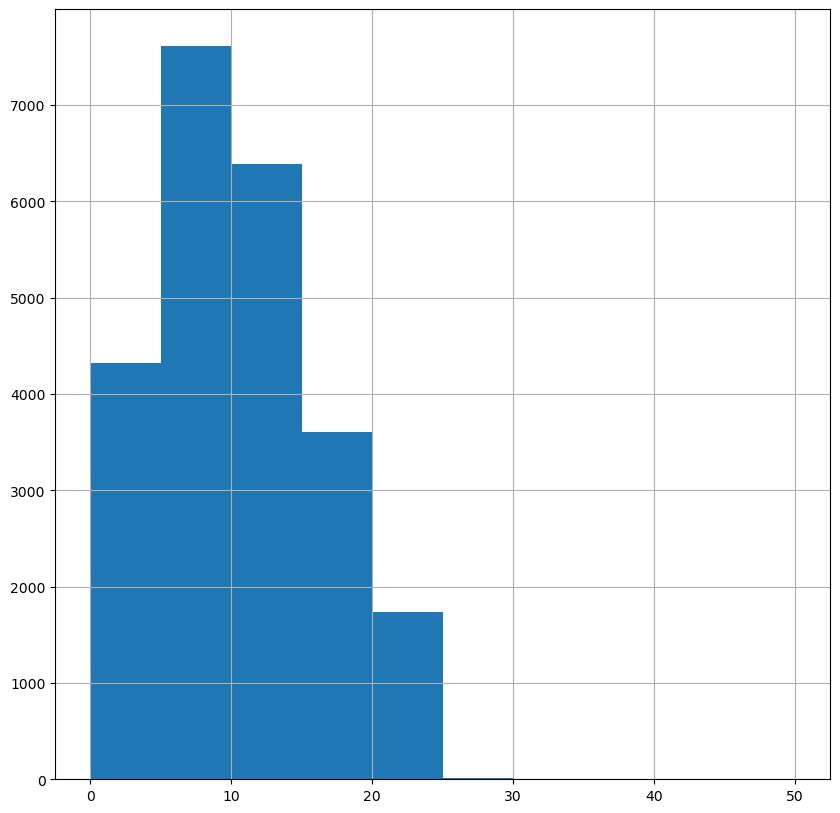

In [17]:
data['total_images'].hist(figsize = (10, 10))
print(data['total_images'].describe())

Диаграмма числа фотографий квартиры в объявлении соответствует нормальному распределению.

The diagram of the number of photographs of an apartment in an ad corresponds to a normal distribution.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


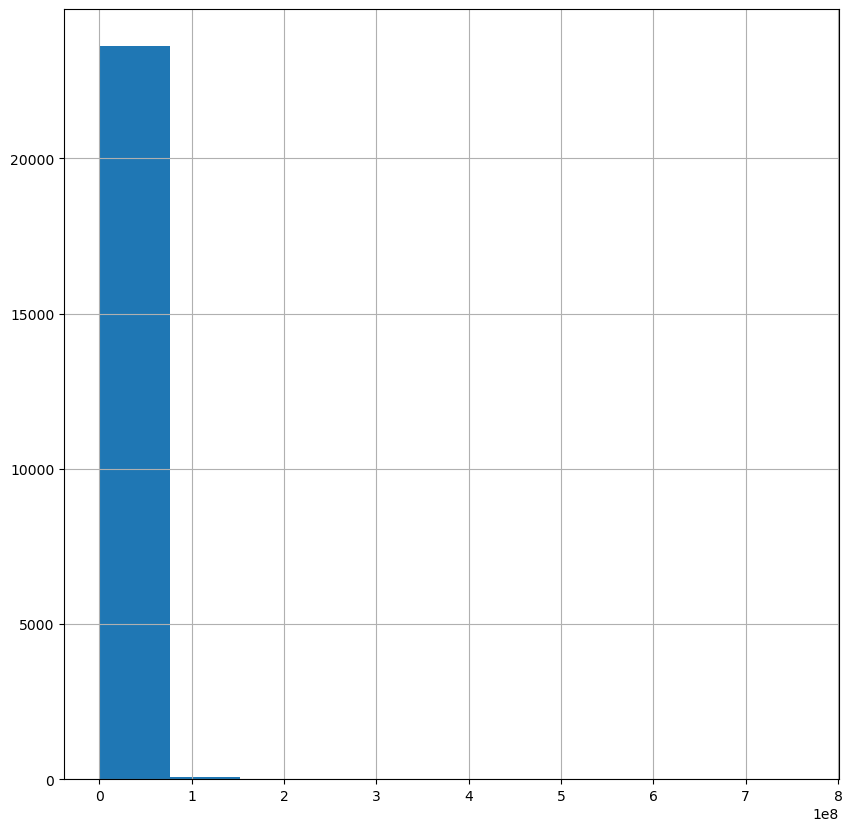

In [18]:
data['last_price'].hist(figsize = (10, 10))
print(data['last_price'].describe())

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


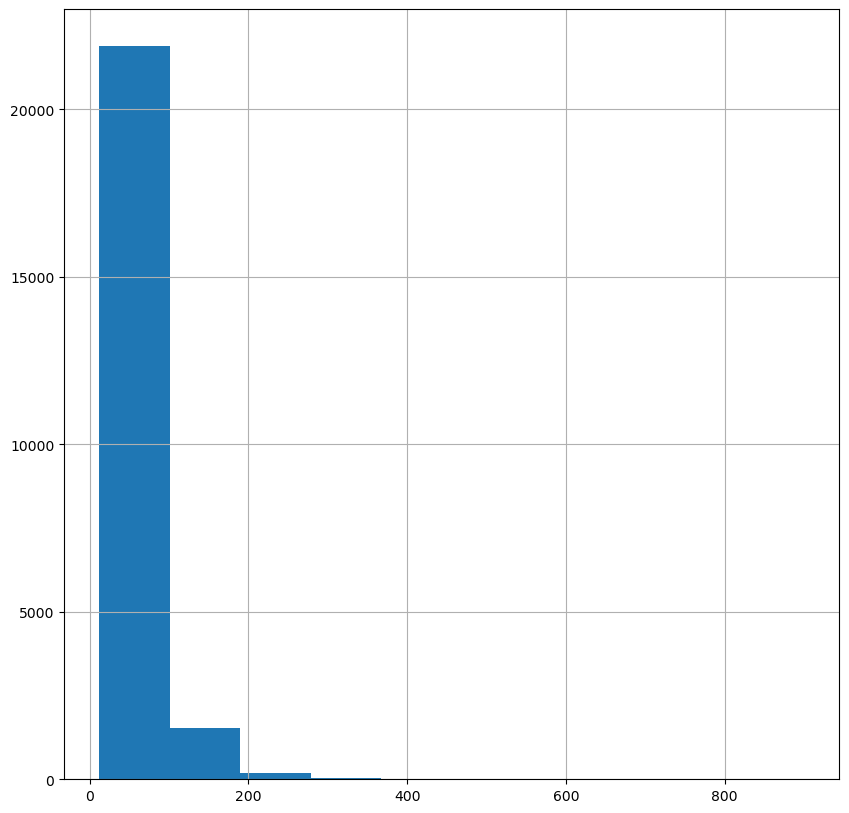

In [19]:
data['total_area'].hist(figsize = (10, 10))
print(data['total_area'].describe())

Диаграмма общей площади квартиры в квадратных метрах соответствует распределению Пуассона.

The diagram of the total area of ​​the apartment in square meters follows the Poisson distribution.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


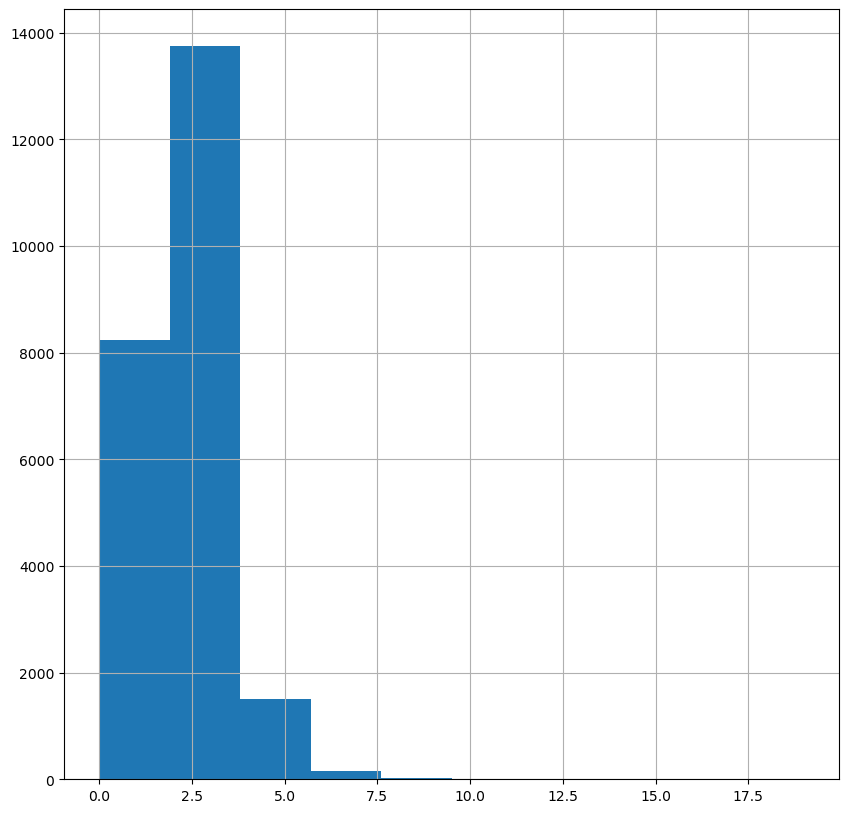

In [20]:
data['rooms'].hist(figsize = (10, 10))
print(data['rooms'].describe())

Диаграмма числа комнат соответствует распределению Пуассона.

The number of rooms plot follows a Poisson distribution.

count    14502.000000
mean         2.731036
std          0.350108
min          1.200000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

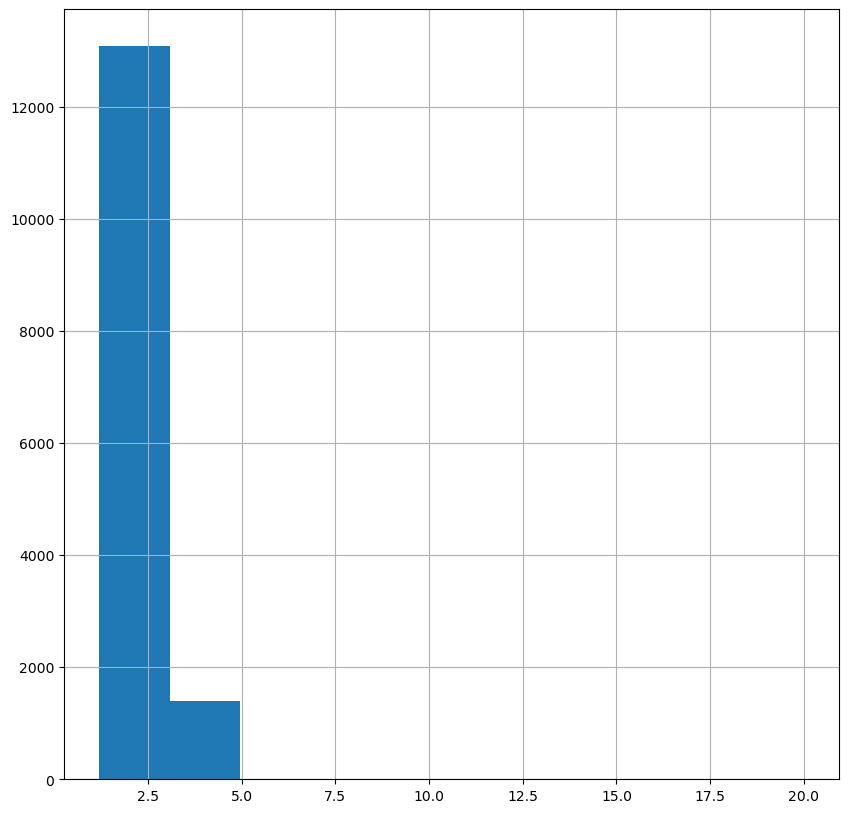

In [21]:
#data_height = data.query('ceiling_height.isna()==False & ceiling_height!=0 & ceiling_height!=')
#data_height['ceiling_height'].hist(figsize = (10, 10))
#data_height['ceiling_height'].describe()
data_ceiling_height = data.loc[(data['ceiling_height'].isna()==False)  & (data['ceiling_height']!='')]
data['ceiling_height'] = data_ceiling_height['ceiling_height'].astype(float)
data['ceiling_height'].hist(figsize = (10, 10))
data['ceiling_height'].describe()

Средняя высота потолков составляет 2.73 м. Диаграмма высоты потолков соответствует распределению Пуассона.

The average ceiling height is 2.73 m. The ceiling height diagram follows the Poisson distribution.

count    23611.000000
mean        10.669984
std          6.584146
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

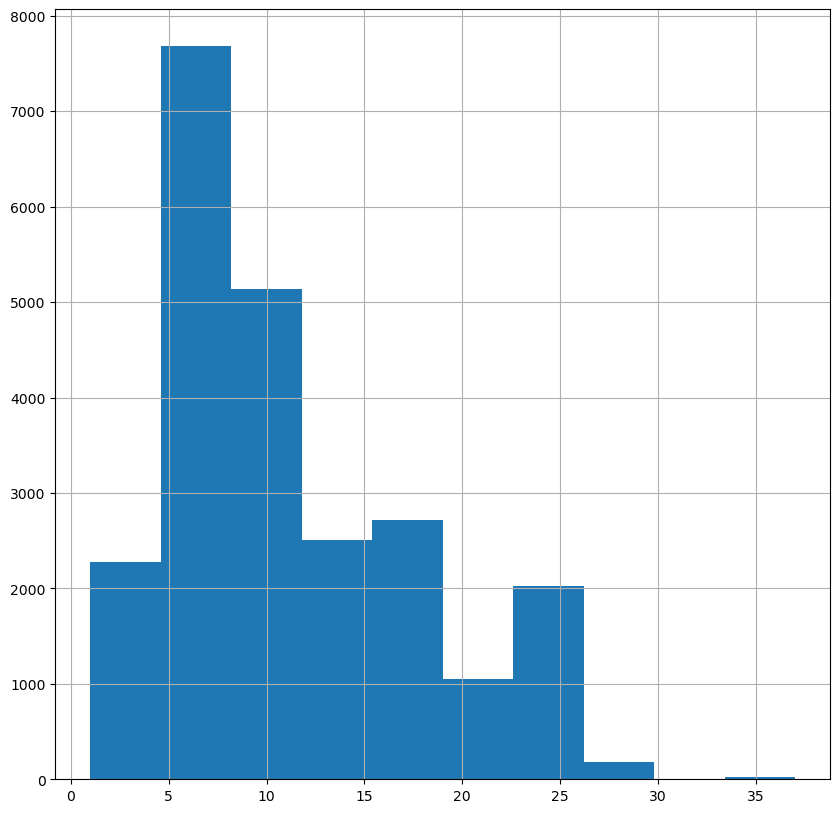

In [22]:
#data['floors_total'].hist()
data_floors = data.loc[(data['floors_total'].isna()==False) & (data['floors_total']!='')]
#data.loc[(data['floors_total'].isna()==False) & (data['floors_total']!='Nan'), 'floors_total'] = data['floors_total'].astype(int)

data['floors_total'] = data_floors['floors_total'].astype(int)
#print(data['floors_total'].isna().sum())
data['floors_total'].hist(figsize = (10, 10))
data['floors_total'].describe()
#print(data_floors)
#data_floors['floors_total'].hist(figsize = (10, 10))
#data_floors['floors_total'].describe()

Диаграмма общего количества этажей соответствует нормальному распределению.

The diagram of the total number of floors follows a normal distribution.

count      23699
unique         3
top       другой
freq       17446
Name: type_of_floor, dtype: object


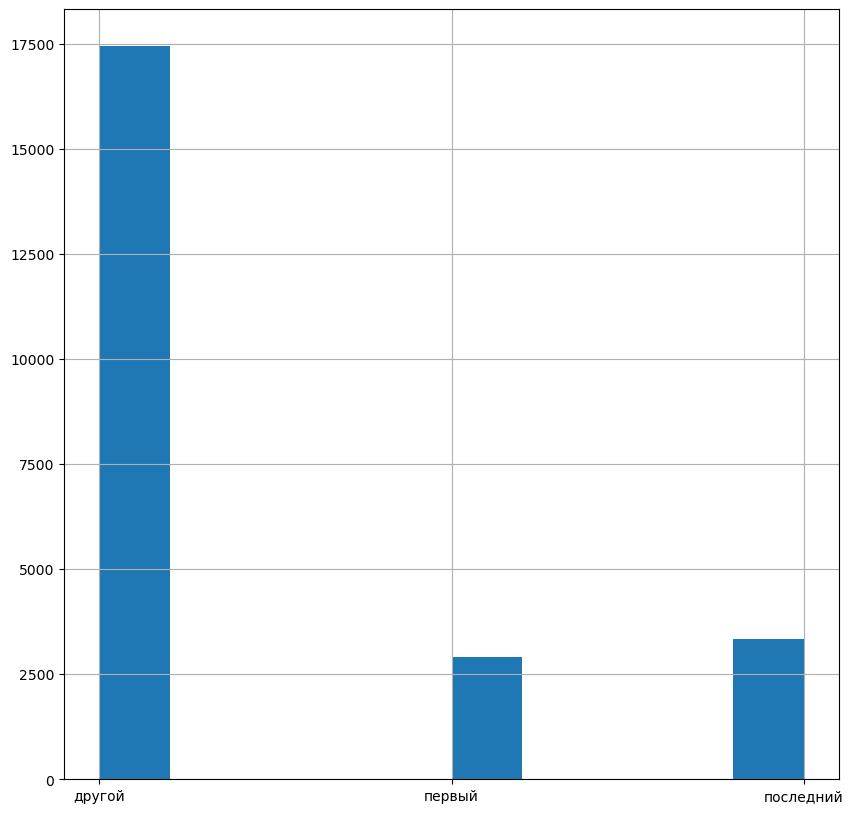

In [23]:
data['type_of_floor'].hist(figsize = (10, 10))
print(data['type_of_floor'].describe())

Большая часть недвижимости находится не на первом и не на последних этажах.

Most of the real estate is not on the first or last floors.

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


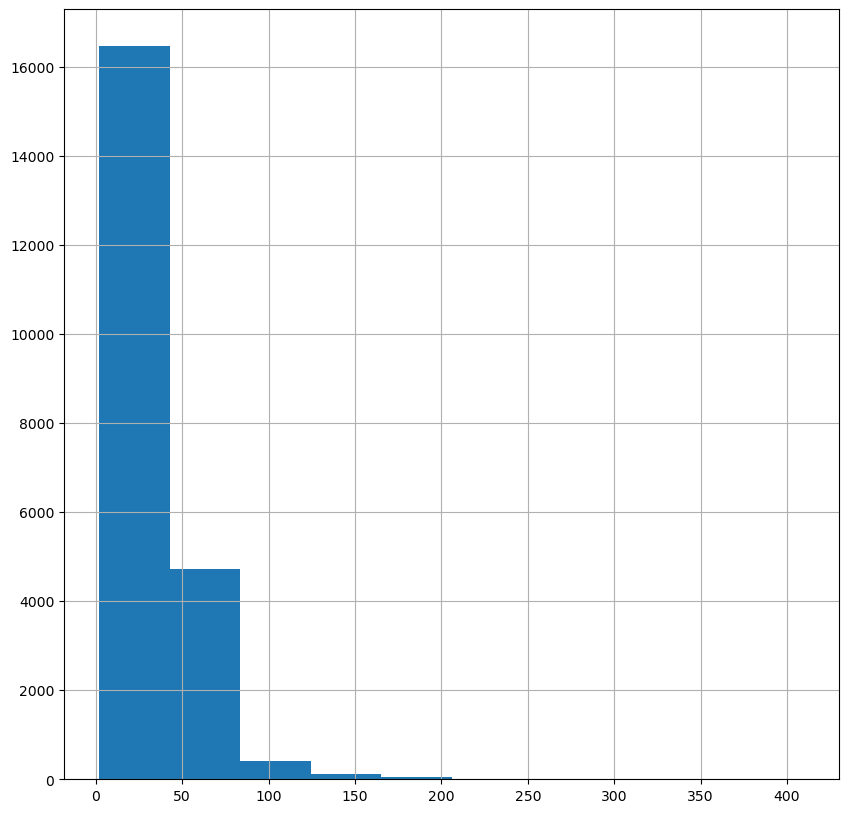

In [24]:
data['living_area'].hist(figsize = (10, 10))
print(data['living_area'].describe())

Диаграмма жилой площади в квадратных метрах соответствует распределению Пуассона.

The plot of living area in square meters follows a Poisson distribution.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


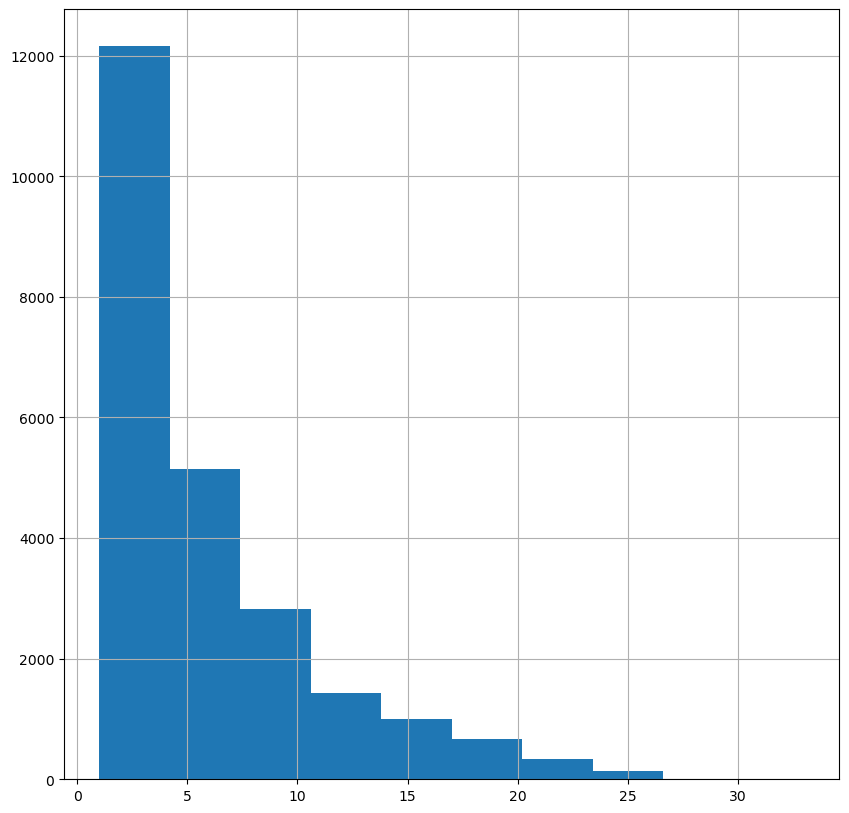

In [25]:
data['floor'].hist(figsize = (10, 10))
print(data['floor'].describe())

Диаграмма типа этажа соответствует распределению Пуассона.

The floor type diagram follows a Poisson distribution.

count    21421.000000
mean        10.441897
std          5.265121
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max         50.000000
Name: kitchen_area, dtype: float64


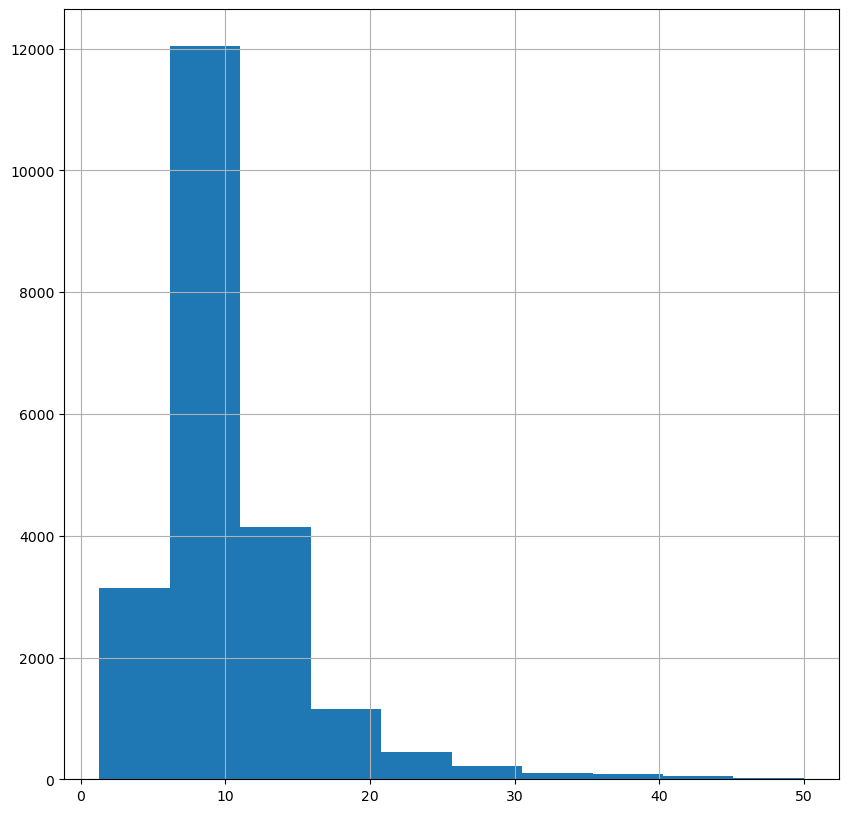

In [26]:
data['kitchen_area'].hist(figsize = (10, 10))
print(data['kitchen_area'].describe())

Диаграмма площади кухни в квадратных метрах соответствует нормальному распределению.

A diagram of the kitchen area in square meters follows a normal distribution.

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


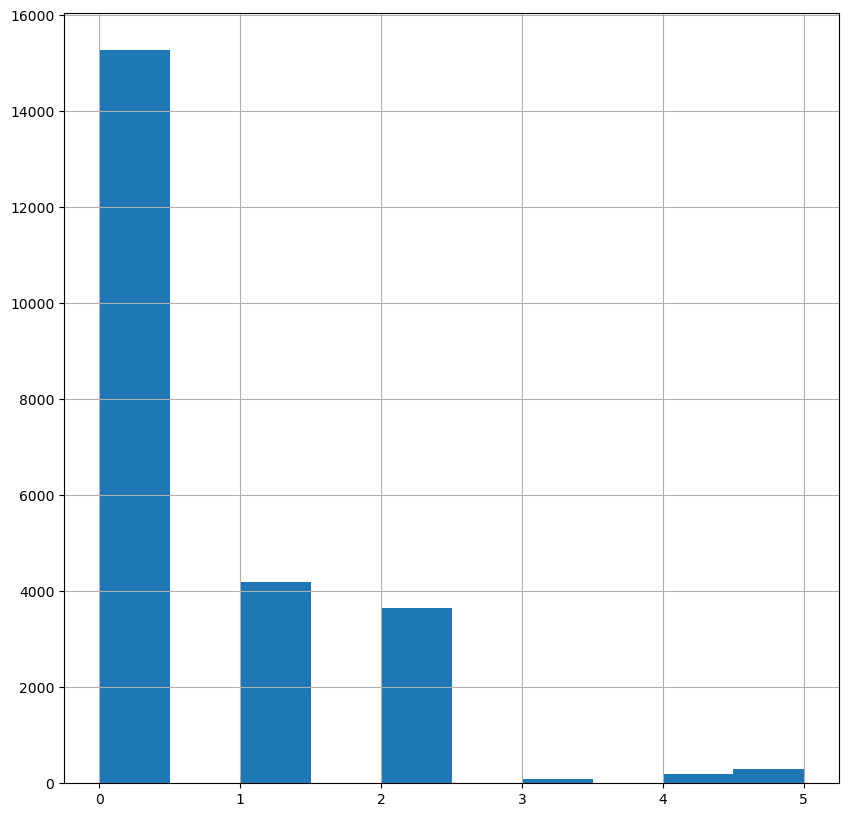

In [27]:
data['balcony'].hist(figsize = (10, 10))
print(data['balcony'].describe())

Диаграмма жилой площади в квадратных метрах соответствует распределению Пуассона.

The plot of living area in square meters follows a Poisson distribution.

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


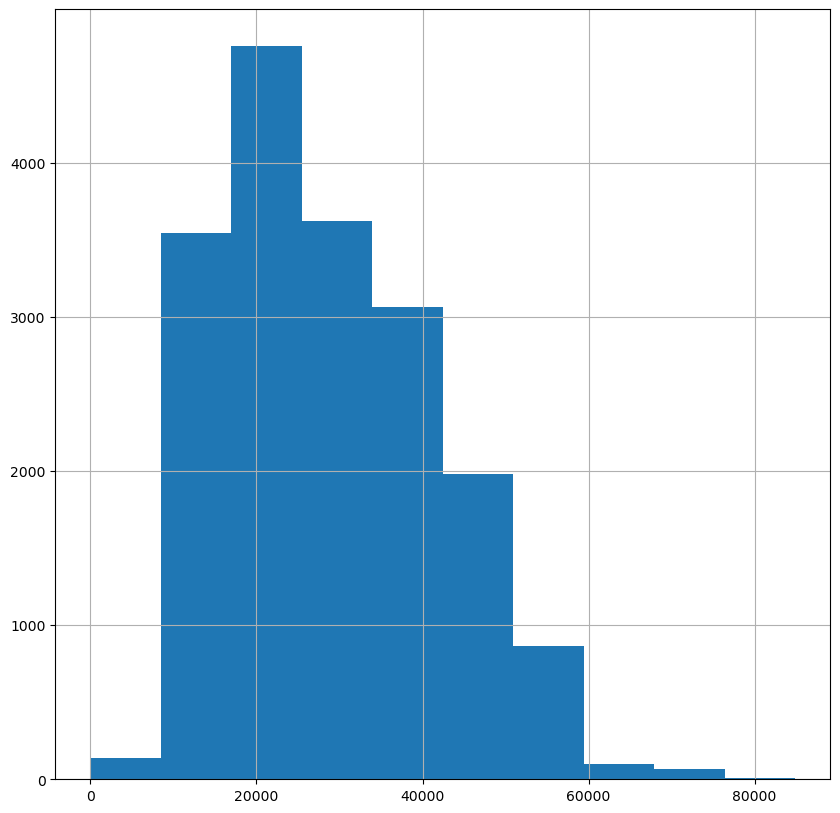

In [28]:
data['airports_nearest'].hist(figsize = (10, 10))
print(data['airports_nearest'].describe())

Диаграмма расстояния до ближайшего аэропорта в метрах соответствует нормальному распределению.

The diagram of the distance to the nearest airport in meters follows a normal distribution.

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


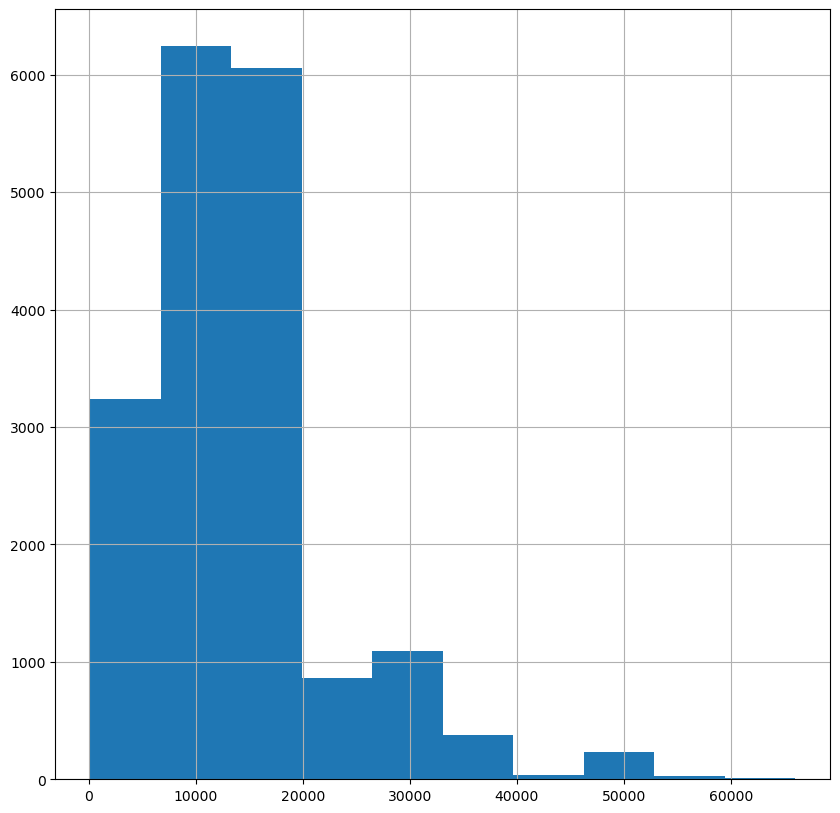

In [29]:
data['cityCenters_nearest'].hist(figsize = (10, 10))
print(data['cityCenters_nearest'].describe())

Диаграмма расстояния до центра города соответствует распределению Пуассона.

The distance to city center diagram follows a Poisson distribution.

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


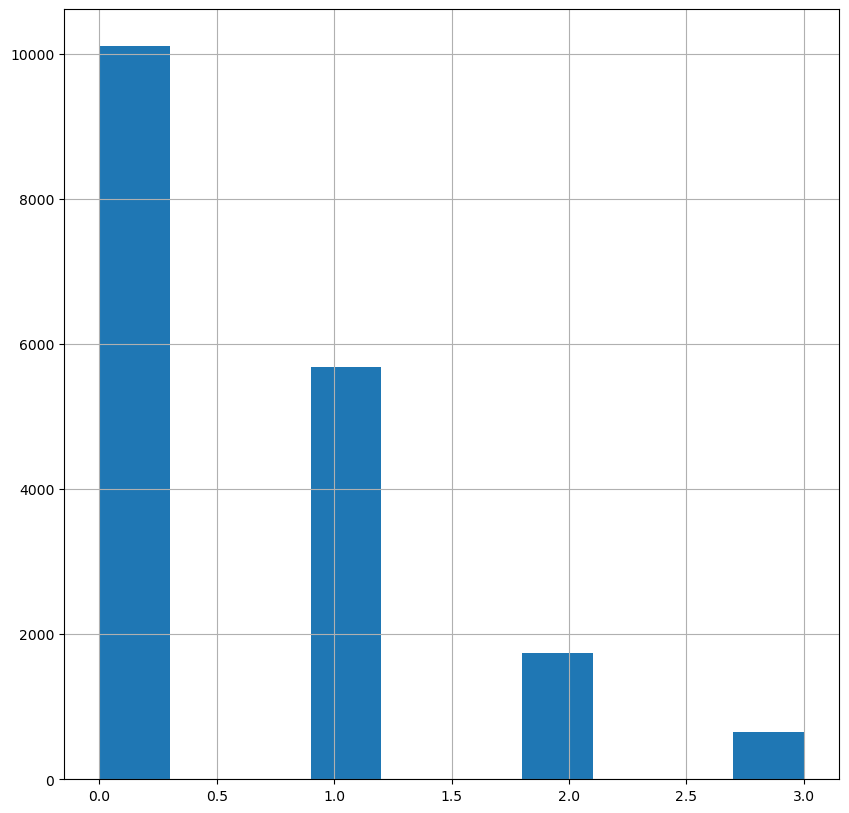

In [30]:
data['parks_around3000'].hist(figsize = (10, 10))
print(data['parks_around3000'].describe())

Диаграмма числа парков в радиусе 3 км соответствует распределению Пуассона.

The plot of the number of parks within a 3 km radius follows a Poisson distribution.

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


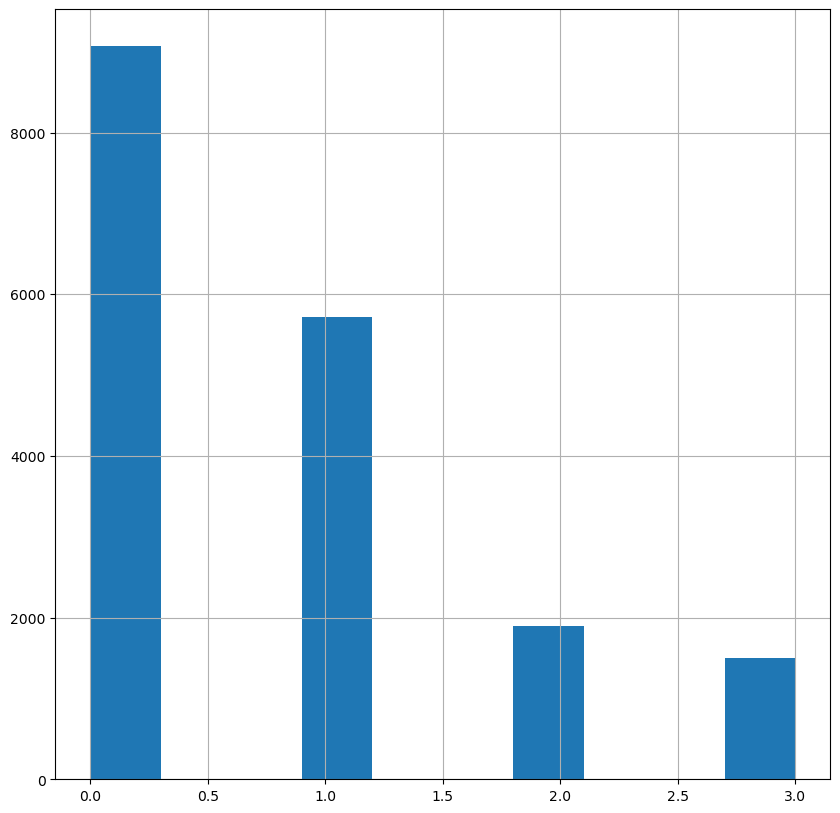

In [31]:
data['ponds_around3000'].hist(figsize = (10, 10))
print(data['ponds_around3000'].describe())

Диаграмма числа водоемов в радиусе 3 км соответствует распределению Пуассона.

The diagram of the number of reservoirs within a 3 km radius corresponds to the Poisson distribution.

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


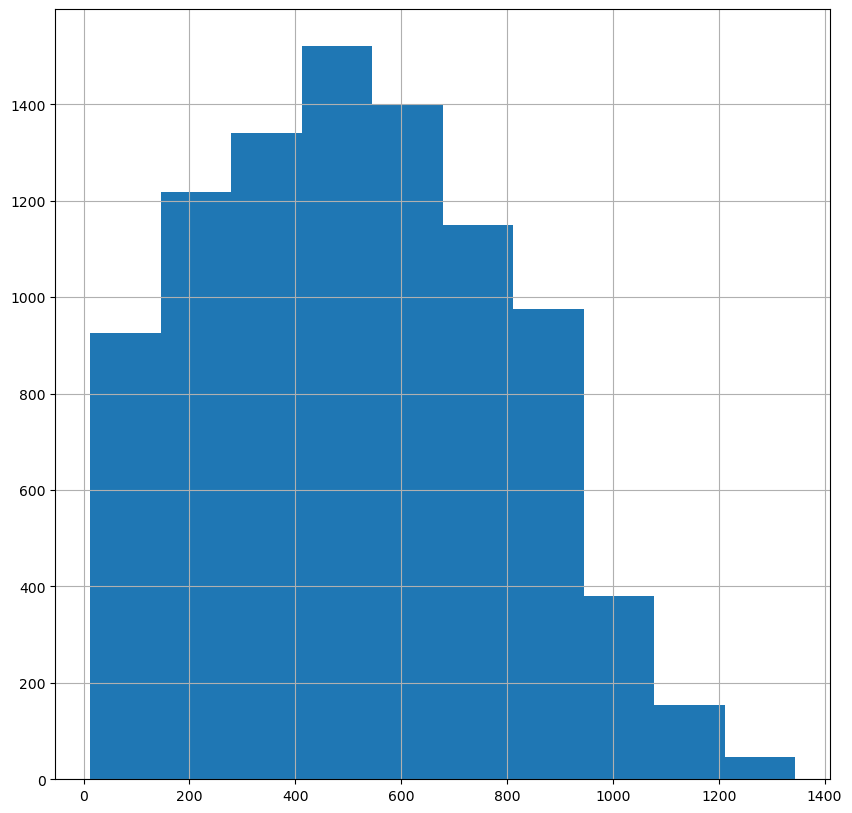

In [32]:
data['ponds_nearest'].hist(figsize = (10, 10))
print(data['ponds_nearest'].describe())

Диаграмма расстояния до ближайшего водоёма соответствует распределению Пуассона.

The distance diagram to the nearest body of water follows the Poisson distribution.

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


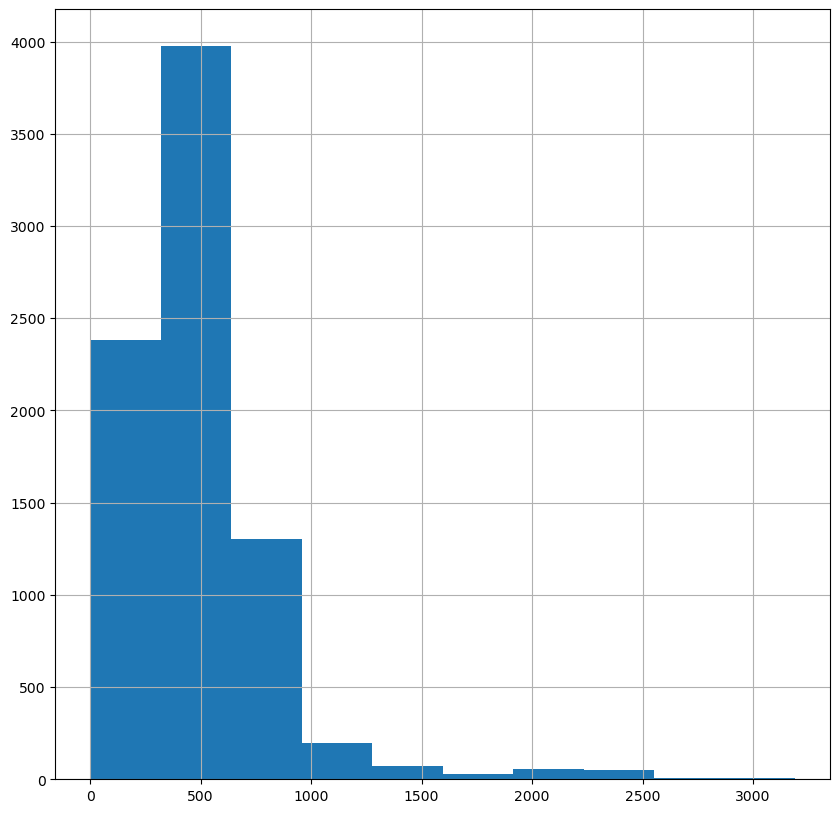

In [33]:
data['parks_nearest'].hist(figsize = (10, 10))
print(data['parks_nearest'].describe())

Диаграмма расстояния до ближайшего парка соответствует распределению Пуассона.

The distance to the nearest park plot follows a Poisson distribution.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


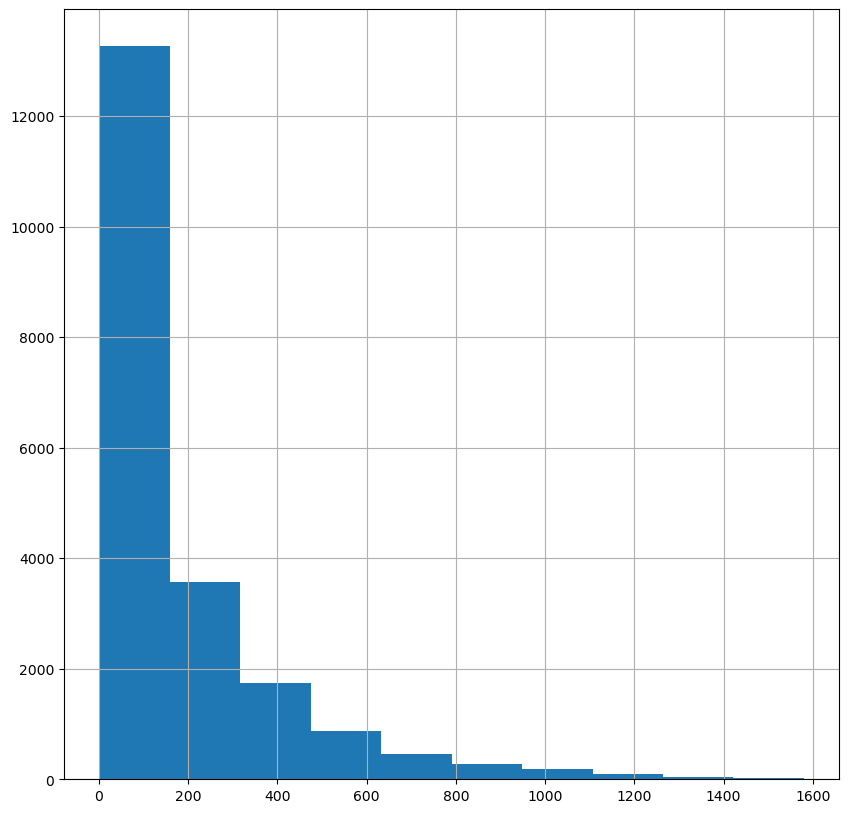

In [34]:
data['days_exposition'].hist(figsize = (10, 10))
print(data['days_exposition'].describe())

Диаграмма количества дней размещения объявления соответствует распределению Пуассона.

The chart for the number of days an ad was posted follows a Poisson distribution.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


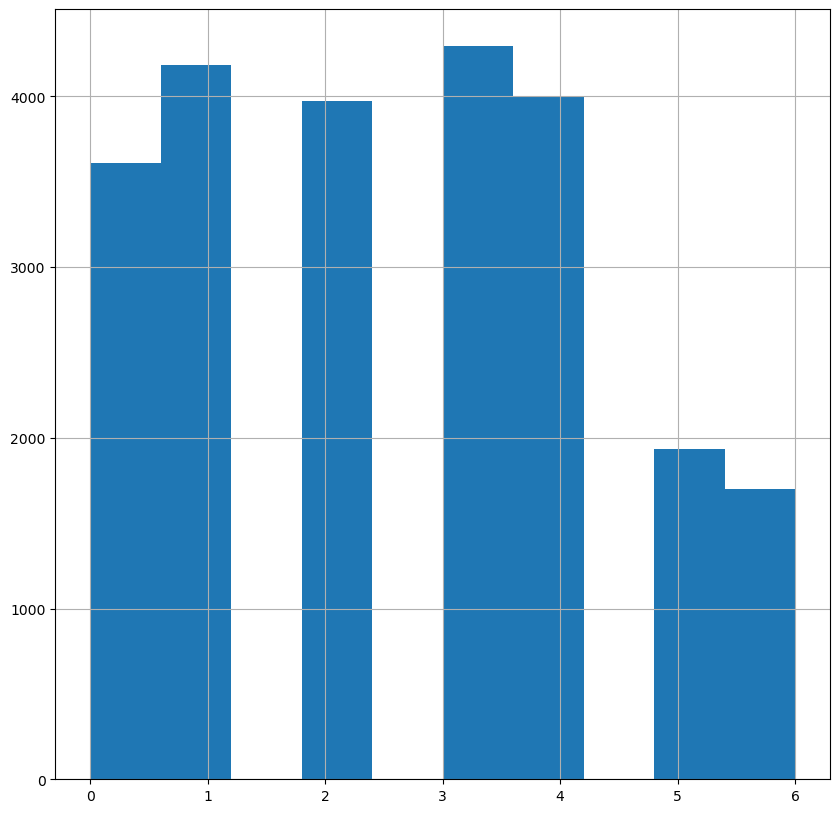

In [35]:
data['day_of_publication'].hist(figsize = (10, 10))
print(data['days_exposition'].describe())

Большая часть публикаций приходится на будние дни.

Most of the publications occur on weekdays.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


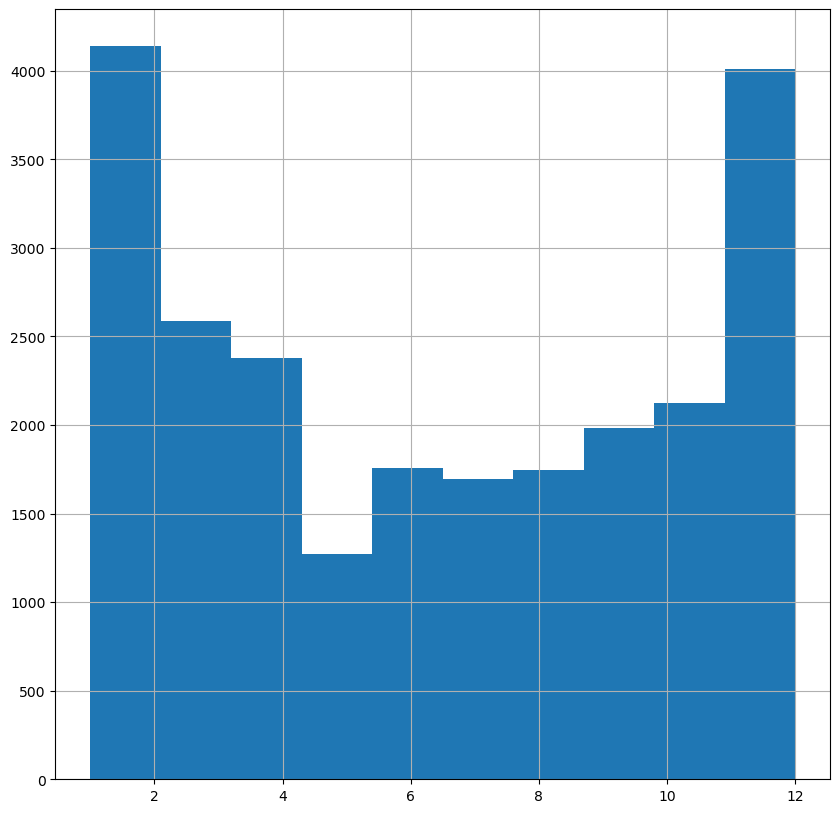

In [36]:
data['month_of_publication'].hist(figsize = (10, 10))
print(data['days_exposition'].describe())

Большая часть публикаций приходится на первые и последние месяцы.

Most of the publications occur in the first and last months.

count    23699.000000
mean      2017.367146
std          1.039771
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_of_publication, dtype: float64


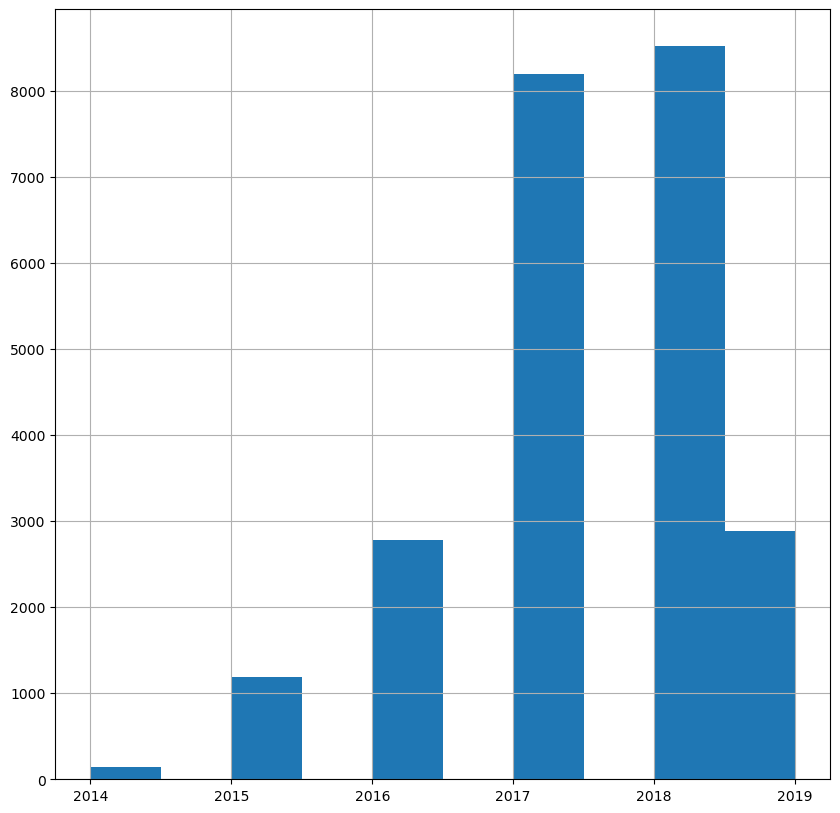

In [37]:
data['year_of_publication'].hist(figsize = (10, 10))
print(data['year_of_publication'].describe())

Большая часть публикаций приходится на 2017-2018 года. В 2019 году наблюдается резкий спад.

Most of the publications are from 2017-2018. 2019 saw a sharp decline.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

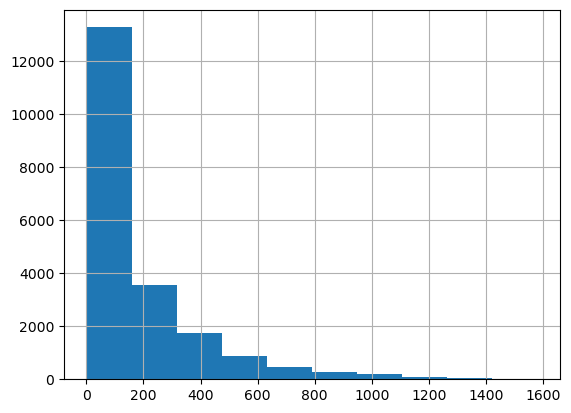

In [38]:
data['days_exposition'].hist()
data['days_exposition'].describe()

Продажи, которые длились меньше 45 дней, являются быстрыми. Продажи, которые длились больше 232 дней, можно считать необычно долгими.

Sales that lasted less than 45 days are fast. Sales that lasted longer than 232 days could be considered unusually long.

            last_price  total_area
last_price    1.000000    0.616478
total_area    0.616478    1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>]],
      dtype=object)

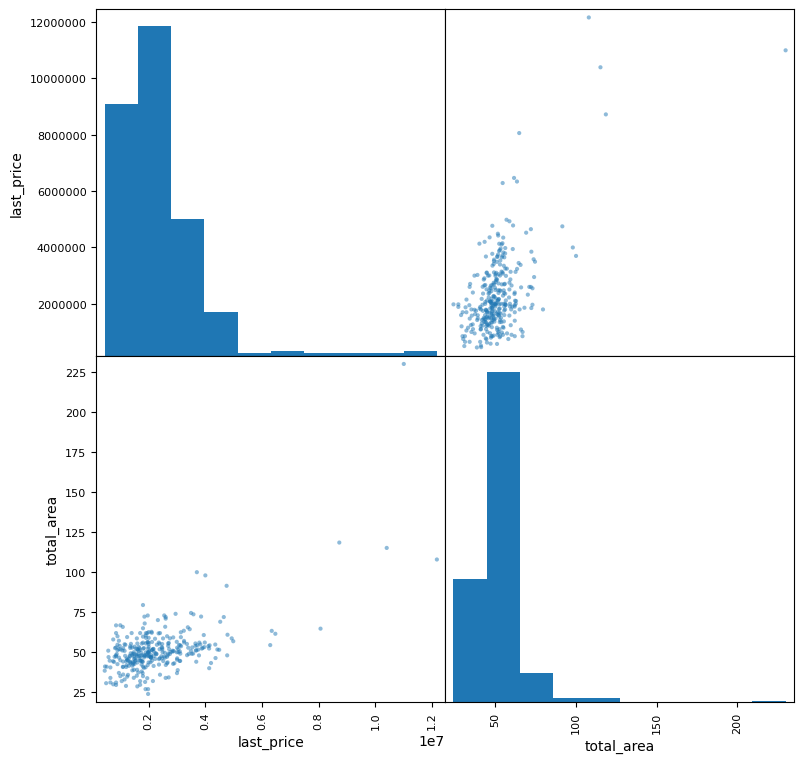

In [39]:
station_stat_multi = data.pivot_table(index = 'locality_name', values = ['total_area', 'last_price'])
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize = (9, 9))

Цена объекта зависит от общей площади. Чем больше площадь, тем дороже объект.

The price of the object depends on the total area. The larger the area, the more expensive the object.

             last_price  living_area
last_price     1.000000     0.472073
living_area    0.472073     1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>]],
      dtype=object)

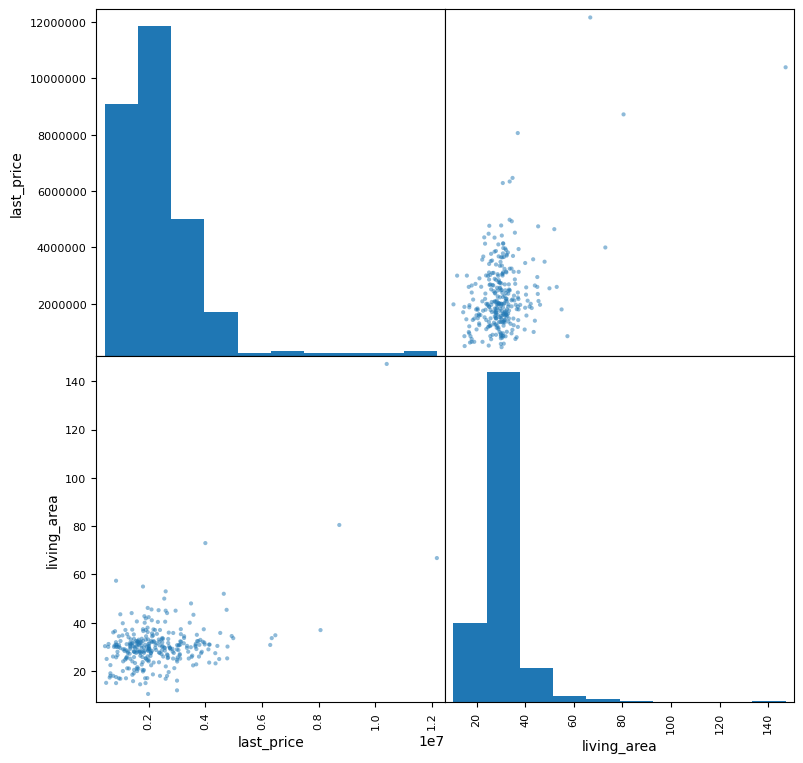

In [40]:
station_stat_multi = data.pivot_table(index = 'locality_name', values = ['living_area', 'last_price'])
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize = (9, 9))

Цена объекта не зависит от жилой площади.

The price of the property does not depend on the living space.

              kitchen_area  last_price
kitchen_area      1.000000    0.552246
last_price        0.552246    1.000000


array([[<AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>]],
      dtype=object)

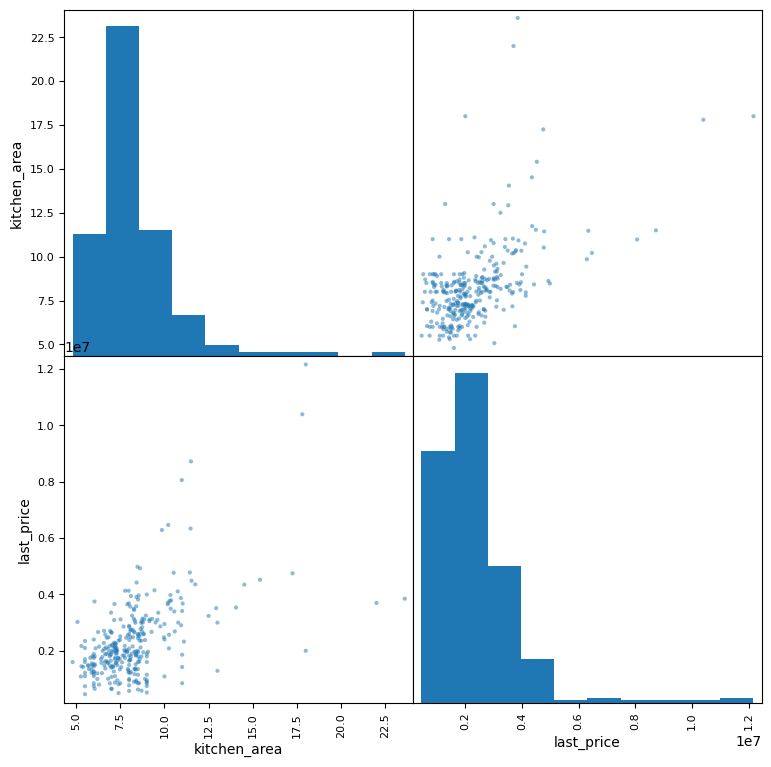

In [41]:
station_stat_multi = data.pivot_table(index = 'locality_name', values = ['kitchen_area', 'last_price'])
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize = (9, 9))

Цена объекта зависит от площади кухни. Чем больше площадь кухни, тем дороже объект.

The price of the object depends on the size of the kitchen. The larger the kitchen area, the more expensive the object.

            last_price     rooms
last_price    1.000000  0.251419
rooms         0.251419  1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>]], dtype=object)

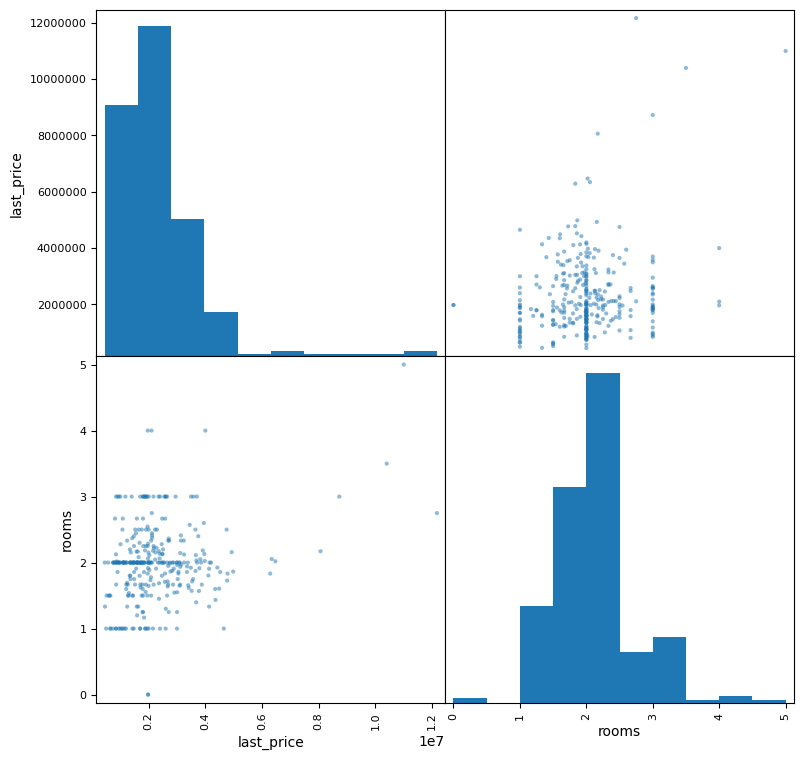

In [42]:
station_stat_multi = data.pivot_table(index = 'locality_name', values = ['rooms', 'last_price'])
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize = (9, 9))

Цена объекта не зависит от количества комнат. 

The price of the property does not depend on the number of rooms.

            last_price  type_floor
last_price    1.000000    0.079477
type_floor    0.079477    1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='type_floor', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='type_floor'>,
        <AxesSubplot:xlabel='type_floor', ylabel='type_floor'>]],
      dtype=object)

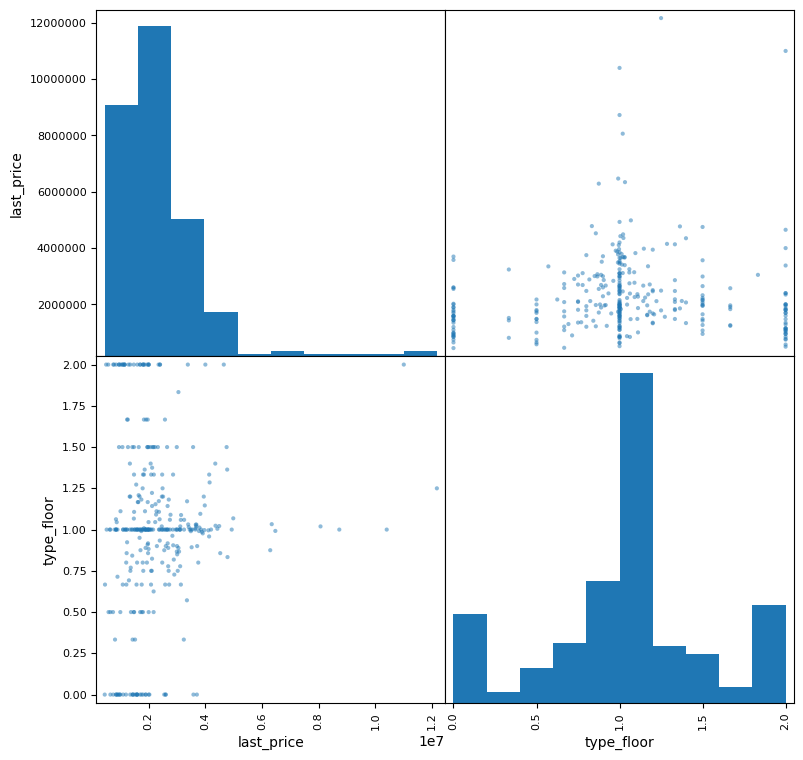

In [43]:
data.loc[data['type_of_floor'] == 'первый', 'type_floor'] = 0
data.loc[data['type_of_floor'] == 'другой', 'type_floor'] = 1
data.loc[data['type_of_floor'] == 'последний', 'type_floor'] = 2
data['type_floor'] = data['type_floor'].astype(int)
station_stat = data.pivot_table(index = 'locality_name', values = ['last_price', 'type_floor'])
print(station_stat.corr())
pd.plotting.scatter_matrix(station_stat, figsize = (9, 9))

Цена объекта не зависит от типа этажа.

The price of the object does not depend on the type of floor.

                     last_price  year_of_publication
last_price             1.000000            -0.082036
year_of_publication   -0.082036             1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='year_of_publication', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='year_of_publication'>,
        <AxesSubplot:xlabel='year_of_publication', ylabel='year_of_publication'>]],
      dtype=object)

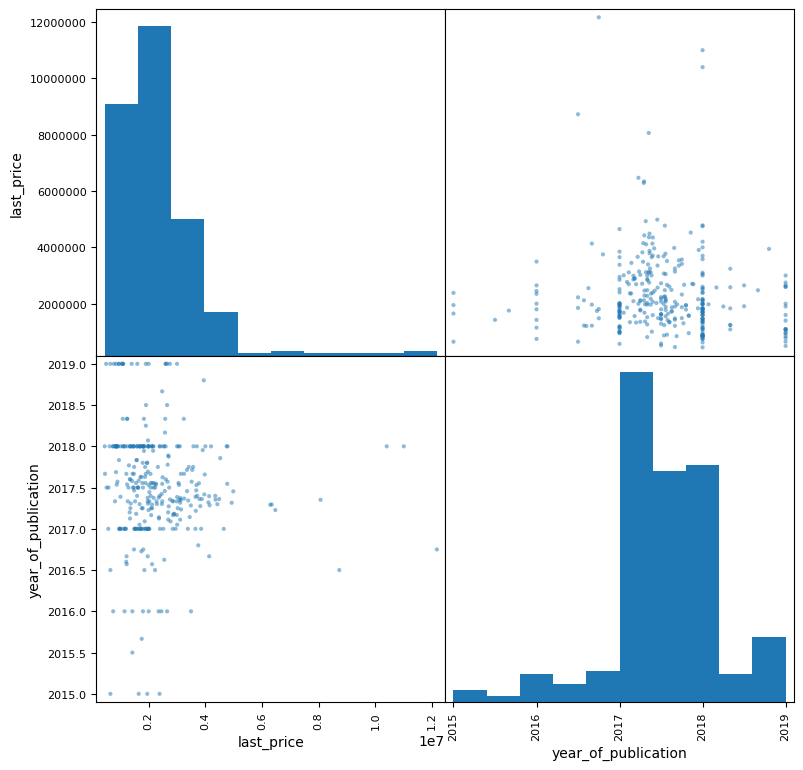

In [44]:
station_stat_multi = data.pivot_table(index = 'locality_name', values = ['year_of_publication', 'last_price'])
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize = (9, 9))

Цена объекта не зависит от года публикации. 

The price of the object does not depend on the year of publication.

                      last_price  month_of_publication
last_price              1.000000             -0.051765
month_of_publication   -0.051765              1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='month_of_publication', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='month_of_publication'>,
        <AxesSubplot:xlabel='month_of_publication', ylabel='month_of_publication'>]],
      dtype=object)

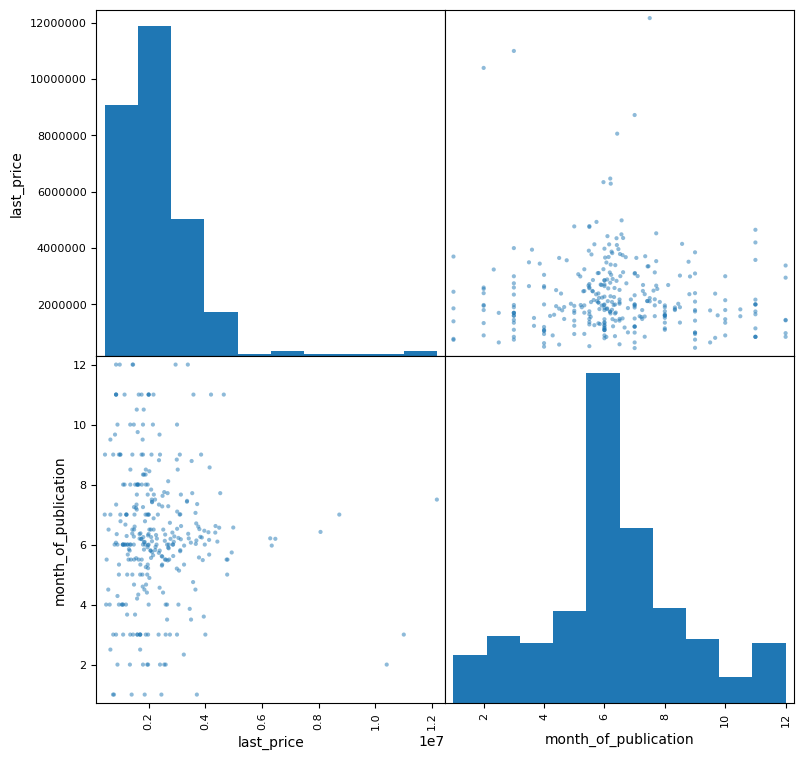

In [45]:
station_stat_multi = data.pivot_table(index = 'locality_name', values = ['month_of_publication', 'last_price'])
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize = (9, 9))

Цена объекта не зависит от месяца публикации.

The price of an object does not depend on the month of publication.

                    day_of_publication  last_price
day_of_publication            1.000000   -0.049388
last_price                   -0.049388    1.000000


array([[<AxesSubplot:xlabel='day_of_publication', ylabel='day_of_publication'>,
        <AxesSubplot:xlabel='last_price', ylabel='day_of_publication'>],
       [<AxesSubplot:xlabel='day_of_publication', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>]],
      dtype=object)

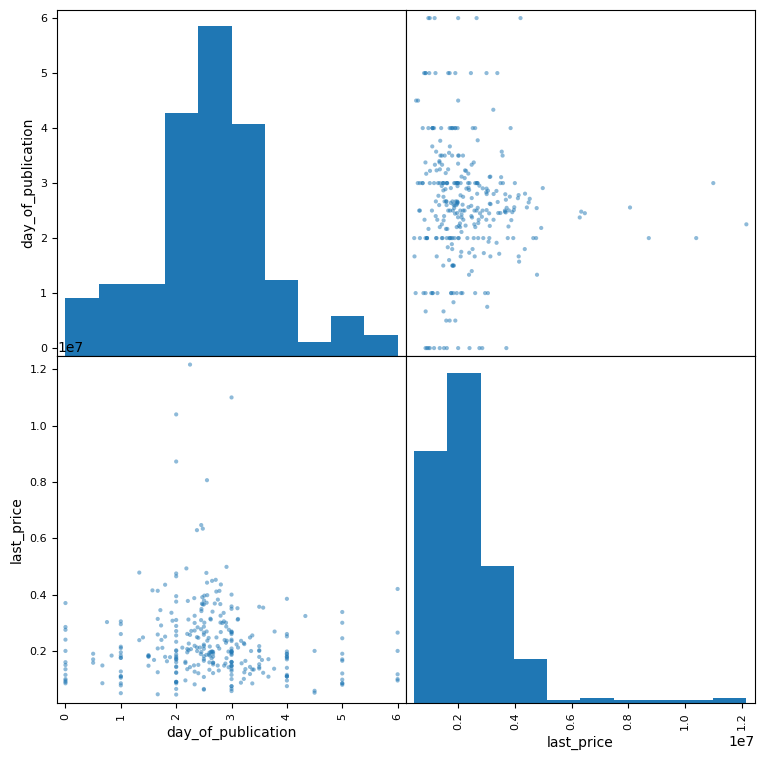

In [46]:
station_stat_multi = data.pivot_table(index = 'locality_name', values = ['day_of_publication', 'last_price'])
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize = (9, 9))

Цена объекта не зависит от дня публикации.

The price of an object does not depend on the day of publication.

In [47]:
for t in data['locality_name'].unique():
    data.loc[data['locality_name'] == t, 'mean_price_one_metre'] = data.loc[data['locality_name'] == t, 'price_one_metre'].mean()
    data.loc[data['locality_name'] == t, 'count'] = data.loc[data['locality_name'] == t, 'price_one_metre'].count()   
dat = data.loc[:, ['locality_name', 'mean_price_one_metre', 'count']]
dat = dat.drop_duplicates()
dat = dat.sort_values(by = 'count', ascending = False).head(10)
dat = dat.reset_index()
print(dat)
print('Самая высокая стоимость', dat.loc[0, 'locality_name'])
print('Самая низкая стоимость', dat.loc[9, 'locality_name'])

   index    locality_name  mean_price_one_metre    count
0      0  Санкт-Петербург         114849.008794  15721.0
1      8           Мурино          86087.512050    590.0
2     22          Кудрово          95324.930544    472.0
3      1           Шушары          78677.364217    440.0
4    112       Всеволожск          68654.473986    398.0
5     14           Пушкин         103125.819291    369.0
6     33          Колпино          75424.579098    338.0
7      6        Парголово          90175.913458    327.0
8     47          Гатчина          68746.146763    307.0
9     69           Выборг          58141.909153    237.0
Самая высокая стоимость Санкт-Петербург
Самая низкая стоимость Выборг


In [48]:
data.loc[(data['city_centre_kilometres'].isna()==False) & (data['locality_name']=='Санкт-Петербург'), 'price_to_centre_kilometres'] = data['last_price']/data['city_centre_kilometres']
data_spb = data.query('locality_name == "Санкт-Петербург"')
print(data_spb.loc[:,['price_to_centre_kilometres', 'city_centre_kilometres', 'last_price']])
print('средняя цена 1 километра в Санкт-Петербурге', data['price_to_centre_kilometres'].mean())

       price_to_centre_kilometres  city_centre_kilometres  last_price
0                    8.110806e+05                  16.028  13000000.0
2                    3.729276e+05                  13.933   5196000.0
3                    9.544118e+06                   6.800  64900000.0
4                    1.234873e+06                   8.098  10000000.0
7                    6.803335e+05                  11.634   7915000.0
...                           ...                     ...         ...
23689                2.207574e+05                  16.081   3550000.0
23690                8.781734e+05                   6.263   5500000.0
23691                2.109601e+06                   4.489   9470000.0
23694                2.292060e+06                   4.232   9700000.0
23697                1.107198e+06                  10.364  11475000.0

[15721 rows x 3 columns]
средняя цена 1 километра в Санкт-Петербурге 1519442.2231346972


<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

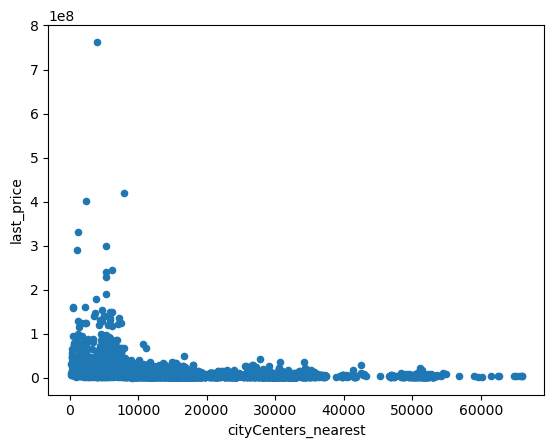

In [49]:
data.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter')

Стоимость объектов зависит от расстояния до центра города. Чем ближе к центру находится объект, тем он дороже.

The cost of objects depends on the distance to the city center. The closer to the center the object is, the more expensive it is.

### Общий вывод / General conclusion

В ходе исследования было установлено: общая площадь, кухонная площадь влияют на цену объекта. Чем больше эти площади, тем выше цена на объект.
Существует зависимость между удаленностью от центра и ценой. Чем ближе к центру находится жильё, тем оно дороже.

Количество комнат, жилая площадь и этаж не влияют на цену недвижимости.

Год публикации, месяц и день также не влияют на цену.

Можно проследить закономерность между годом, днем недели, временем и публикациями.
Большая часть объявлений приходится на 2017-2018 года, в первый и последний месяцы, в будние дни.

The study found that the total area and kitchen area affect the price of the property. The larger these areas, the higher the price of the object.
There is a relationship between distance from the center and price. The closer to the center the housing is, the more expensive it is.

The number of rooms, living area and floor do not affect the price of the property.

The year of publication, month and day also do not affect the price.

You can trace a pattern between the year, day of the week, time and publications.
Most of the announcements occur in 2017-2018, in the first and last months, on weekdays.